# Broadway Weekly Grosses
Today we are going to analyze the database mentioned in the title and extracted from https://www.kaggle.com/jessemostipak/broadway-weekly-grosses?select=grosses.csv.
This database contains data from 1985 to 2020.
We are going to perform tasks of cleaning, ordering and analysis of the different variables.

In [2]:
#Importing the main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Importing the database
df = pd.read_csv(r'C:\Users\gian_\Desktop\Data_Analyst\Projects\Broadway_weekly_grosses\grosses.csv')
df.head()

,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews
0,1985-06-09,1,3915937.0,42nd Street,St. James Theatre,282368.0,NaN,30.42,NaN,9281,1655,0.7010,8,0
1,1985-06-09,1,3915937.0,A Chorus Line,Sam S. Shubert Theatre,222584.0,NaN,27.25,NaN,8167,1472,0.6935,8,0
2,1985-06-09,1,3915937.0,Aren't We All?,Brooks Atkinson Theatre,249272.0,NaN,33.75,NaN,7386,1088,0.8486,8,0
3,1985-06-09,1,3915937.0,Arms and the Man,Circle in the Square Theatre,95688.0,NaN,20.87,NaN,4586,682,0.8405,8,0
4,1985-06-09,1,3915937.0,As Is,Lyceum Theatre,61059.0,NaN,20.78,NaN,2938,684,0.5369,8,0


In [4]:
print(df.columns)

Index(['week_ending', 'week_number', 'weekly_gross_overall', 'show', 'theatre',
       'weekly_gross', 'potential_gross', 'avg_ticket_price',
       'top_ticket_price', 'seats_sold', 'seats_in_theatre', 'pct_capacity',
       'performances', 'previews'],
      dtype='object')


In [5]:
#Selecting the columns that we are going to use
df = df[["week_ending", "week_number", "show", "theatre", "weekly_gross", "avg_ticket_price", "seats_sold", "seats_in_theatre", "pct_capacity", "performances"]]

In [6]:
df

,week_ending,week_number,show,theatre,weekly_gross,avg_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances
0,1985-06-09,1,42nd Street,St. James Theatre,282368.00,30.42,9281,1655,0.7010,8
1,1985-06-09,1,A Chorus Line,Sam S. Shubert Theatre,222584.00,27.25,8167,1472,0.6935,8
2,1985-06-09,1,Aren't We All?,Brooks Atkinson Theatre,249272.00,33.75,7386,1088,0.8486,8
3,1985-06-09,1,Arms and the Man,Circle in the Square Theatre,95688.00,20.87,4586,682,0.8405,8
4,1985-06-09,1,As Is,Lyceum Theatre,61059.00,20.78,2938,684,0.5369,8
...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,The Phantom of the Opera,Majestic Theatre,639215.93,72.18,8856,1605,0.6897,8
47520,2020-03-01,40,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1320766.00,132.02,10004,1478,0.8461,8
47521,2020-03-01,40,To Kill A Mockingbird,Sam S. Shubert Theatre,1132278.54,115.41,9811,1435,0.9767,7
47522,2020-03-01,40,West Side Story,Broadway Theatre,1598947.32,114.87,13920,1740,1.0000,8


In [7]:
#Checking for missing data
missing_data = df.isnull()
missing_data.head()

,week_ending,week_number,show,theatre,weekly_gross,avg_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [8]:
missing_data.tail()

,week_ending,week_number,show,theatre,weekly_gross,avg_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances
47519,False,False,False,False,False,False,False,False,False,False
47520,False,False,False,False,False,False,False,False,False,False
47521,False,False,False,False,False,False,False,False,False,False
47522,False,False,False,False,False,False,False,False,False,False
47523,False,False,False,False,False,False,False,False,False,False


In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

week_ending
False    47524
Name: week_ending, dtype: int64

week_number
False    47524
Name: week_number, dtype: int64

show
False    47524
Name: show, dtype: int64

theatre
False    47524
Name: theatre, dtype: int64

weekly_gross
False    47524
Name: weekly_gross, dtype: int64

avg_ticket_price
False    47524
Name: avg_ticket_price, dtype: int64

seats_sold
False    47524
Name: seats_sold, dtype: int64

seats_in_theatre
False    47524
Name: seats_in_theatre, dtype: int64

pct_capacity
False    47524
Name: pct_capacity, dtype: int64

performances
False    47524
Name: performances, dtype: int64



In [10]:
#Exploring the df
df.dtypes

week_ending          object
week_number           int64
show                 object
theatre              object
weekly_gross        float64
avg_ticket_price    float64
seats_sold            int64
seats_in_theatre      int64
pct_capacity        float64
performances          int64
dtype: object

In [11]:
df["week_ending"] = pd.to_datetime(df["week_ending"])

In [12]:
df.dtypes

week_ending         datetime64[ns]
week_number                  int64
show                        object
theatre                     object
weekly_gross               float64
avg_ticket_price           float64
seats_sold                   int64
seats_in_theatre             int64
pct_capacity               float64
performances                 int64
dtype: object

In [13]:
df.describe()

,week_number,weekly_gross,avg_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances
count,47524.000000,4.752400e+04,47524.000000,47524.000000,47524.000000,47524.000000,47524.000000
mean,27.372170,5.744868e+05,67.914736,7893.449668,1237.793536,0.802753,7.237754
std,15.310139,4.433470e+05,38.589416,3186.019908,358.357398,0.176418,2.229733
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,2.622292e+05,43.370000,5442.000000,1021.000000,0.691400,8.000000
50%,28.000000,4.700645e+05,60.235000,7736.000000,1181.000000,0.833000,8.000000
75%,41.000000,7.584381e+05,84.652500,10187.000000,1509.000000,0.953800,8.000000
max,53.000000,4.041493e+06,511.580000,24305.000000,1969.000000,1.553600,17.000000


In [14]:
#We can observe that we have values in avg_ticket price, seats_sold, seats_in_theatre, pct_capacity and performances = 0. 
# Thats must be an error but we are going to do a deeply exploration
avg_ticket_price_0 = df.loc[df['avg_ticket_price'] == 0]
avg_ticket_price_0

,week_ending,week_number,show,theatre,weekly_gross,avg_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances
821,1986-03-30,43,"The Flying Karamazov Brothers ""Juggling and Ch...",Vivian Beaumont Theater,0.0,0.0,0,1105,0.0,0
843,1986-04-06,44,"The Flying Karamazov Brothers ""Juggling and Ch...",Vivian Beaumont Theater,0.0,0.0,0,1105,0.0,8
866,1986-04-13,45,"The Flying Karamazov Brothers ""Juggling and Ch...",Vivian Beaumont Theater,0.0,0.0,0,1105,0.0,8
890,1986-04-20,46,"The Flying Karamazov Brothers ""Juggling and Ch...",Vivian Beaumont Theater,0.0,0.0,0,1105,0.0,8
7987,1993-04-11,45,Raffi,Gershwin Theatre,0.0,0.0,0,1056,0.0,6
...,...,...,...,...,...,...,...,...,...,...
29899,2008-12-07,28,Young Frankenstein,Hilton Theatre,0.0,0.0,0,1830,0.0,8
29932,2008-12-14,29,Young Frankenstein,Hilton Theatre,0.0,0.0,0,1830,0.0,8
29964,2008-12-21,30,Young Frankenstein,Hilton Theatre,0.0,0.0,0,1830,0.0,8
29995,2008-12-28,31,Young Frankenstein,Hilton Theatre,0.0,0.0,0,1830,0.0,8


In [15]:
#As we can see, there are 125 rows with "0" values. 
#Among all the possible options to deal with this type of problem, I will choose to delete the rows with these values in a while.

In [16]:
#Checking the df, I discovered that in the column "performances" the values of 0 should be replaced by 8.
df['performances'] = df['performances'].replace([0],8)
df.performances.value_counts()

8     43442
7      1554
6       598
5       565
9       436
1       334
4       302
10       97
2        87
11       51
3        35
12       11
15        5
16        3
13        2
14        1
17        1
Name: performances, dtype: int64

In [17]:
df = df.replace(0, np.nan)
df

,week_ending,week_number,show,theatre,weekly_gross,avg_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances
0,1985-06-09,1,42nd Street,St. James Theatre,282368.00,30.42,9281.0,1655.0,0.7010,8
1,1985-06-09,1,A Chorus Line,Sam S. Shubert Theatre,222584.00,27.25,8167.0,1472.0,0.6935,8
2,1985-06-09,1,Aren't We All?,Brooks Atkinson Theatre,249272.00,33.75,7386.0,1088.0,0.8486,8
3,1985-06-09,1,Arms and the Man,Circle in the Square Theatre,95688.00,20.87,4586.0,682.0,0.8405,8
4,1985-06-09,1,As Is,Lyceum Theatre,61059.00,20.78,2938.0,684.0,0.5369,8
...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,The Phantom of the Opera,Majestic Theatre,639215.93,72.18,8856.0,1605.0,0.6897,8
47520,2020-03-01,40,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1320766.00,132.02,10004.0,1478.0,0.8461,8
47521,2020-03-01,40,To Kill A Mockingbird,Sam S. Shubert Theatre,1132278.54,115.41,9811.0,1435.0,0.9767,7
47522,2020-03-01,40,West Side Story,Broadway Theatre,1598947.32,114.87,13920.0,1740.0,1.0000,8


In [18]:
df = df.dropna()
df.head()

,week_ending,week_number,show,theatre,weekly_gross,avg_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances
0,1985-06-09,1,42nd Street,St. James Theatre,282368.0,30.42,9281.0,1655.0,0.7010,8
1,1985-06-09,1,A Chorus Line,Sam S. Shubert Theatre,222584.0,27.25,8167.0,1472.0,0.6935,8
2,1985-06-09,1,Aren't We All?,Brooks Atkinson Theatre,249272.0,33.75,7386.0,1088.0,0.8486,8
3,1985-06-09,1,Arms and the Man,Circle in the Square Theatre,95688.0,20.87,4586.0,682.0,0.8405,8
4,1985-06-09,1,As Is,Lyceum Theatre,61059.0,20.78,2938.0,684.0,0.5369,8


In [19]:
#After replacing the values of the "performances columns", I realized that the value of the same column of row 22884 should be replaced by 1.
df =df.copy()
df.loc[22884, 'performances'] = 1

In [20]:
df.loc[22884]

week_ending                         2004-05-23 00:00:00
week_number                                          52
show                Marc Salem's Mind Games on Broadway
theatre                                  Lyceum Theatre
weekly_gross                                     1037.0
avg_ticket_price                                   43.2
seats_sold                                         24.0
seats_in_theatre                                  712.0
pct_capacity                                     0.0337
performances                                          1
Name: 22884, dtype: object

In [21]:
df.describe()

,week_number,weekly_gross,avg_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances
count,47391.000000,4.739100e+04,47391.000000,47391.000000,47391.000000,47391.000000,47391.000000
mean,27.374523,5.760934e+05,68.103179,7915.159039,1239.685510,0.805005,7.836003
std,15.322095,4.429284e+05,38.478651,3163.807785,354.580762,0.171456,0.859531
min,1.000000,1.037000e+03,2.090000,24.000000,483.000000,0.033700,1.000000
25%,14.000000,2.640425e+05,43.550000,5463.000000,1021.000000,0.692900,8.000000
50%,28.000000,4.710190e+05,60.370000,7749.000000,1181.000000,0.833700,8.000000
75%,41.000000,7.596135e+05,84.710000,10195.500000,1509.000000,0.954000,8.000000
max,53.000000,4.041493e+06,511.580000,24305.000000,1969.000000,1.553600,17.000000


In [22]:
#I am looking to perform a correlation analysis between all the variables in the df, So I will to change the object type values to numerical, as well as categorize them.

In [23]:
df_numeric = df

In [24]:
df_numeric = df_numeric.astype({ "week_ending" : 'category'})
df_numeric['week_ending_num'] = pd.factorize(df_numeric.week_ending)[0]

In [25]:
df_numeric = df_numeric.sort_values(by=['weekly_gross'], inplace = False, ascending = True)

In [26]:
df_numeric

,week_ending,week_number,show,theatre,weekly_gross,avg_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,week_ending_num
22884,2004-05-23,52,Marc Salem's Mind Games on Broadway,Lyceum Theatre,1037.0,43.20,24.0,712.0,0.0337,1,989
14648,1998-10-25,21,A Mom's Life,Belasco Theatre,1648.0,21.97,75.0,1004.0,0.0747,1,698
22916,2004-05-30,53,Marc Salem's Mind Games on Broadway,Lyceum Theatre,1929.0,37.82,51.0,712.0,0.0716,1,990
22124,2003-11-23,26,Oldest Living Confederate Widow Tells All,Longacre Theatre,2478.0,50.57,49.0,1094.0,0.0448,1,963
23398,2004-10-03,18,Marc Salem's Mind Games on Broadway,Lyceum Theatre,3668.0,50.24,73.0,712.0,0.1025,1,1008
...,...,...,...,...,...,...,...,...,...,...,...
45560,2018-12-30,31,The Lion King,Minskoff Theatre,3696974.0,242.15,15267.0,1696.0,1.0002,9,1750
43825,2017-12-24,31,Hamilton,Richard Rodgers Theatre,3797844.0,353.06,10757.0,1321.0,1.0179,8,1697
45348,2018-11-25,26,Hamilton,Richard Rodgers Theatre,3808299.0,354.10,10755.0,1321.0,1.0177,8,1745
43857,2017-12-31,32,Hamilton,Richard Rodgers Theatre,3854874.0,358.46,10754.0,1321.0,1.0176,8,1698


In [27]:
df_numeric = df_numeric.astype({ "show" : 'category', "theatre" : 'category'})
df_numeric['show_num'] = pd.factorize(df_numeric.show)[0]
df_numeric['theatre_num'] = pd.factorize(df_numeric.theatre)[0]

In [28]:
df_numeric

,week_ending,week_number,show,theatre,weekly_gross,avg_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,week_ending_num,show_num,theatre_num
22884,2004-05-23,52,Marc Salem's Mind Games on Broadway,Lyceum Theatre,1037.0,43.20,24.0,712.0,0.0337,1,989,0,0
14648,1998-10-25,21,A Mom's Life,Belasco Theatre,1648.0,21.97,75.0,1004.0,0.0747,1,698,1,1
22916,2004-05-30,53,Marc Salem's Mind Games on Broadway,Lyceum Theatre,1929.0,37.82,51.0,712.0,0.0716,1,990,0,0
22124,2003-11-23,26,Oldest Living Confederate Widow Tells All,Longacre Theatre,2478.0,50.57,49.0,1094.0,0.0448,1,963,2,2
23398,2004-10-03,18,Marc Salem's Mind Games on Broadway,Lyceum Theatre,3668.0,50.24,73.0,712.0,0.1025,1,1008,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45560,2018-12-30,31,The Lion King,Minskoff Theatre,3696974.0,242.15,15267.0,1696.0,1.0002,9,1750,1013,38
43825,2017-12-24,31,Hamilton,Richard Rodgers Theatre,3797844.0,353.06,10757.0,1321.0,1.0179,8,1697,1113,20
45348,2018-11-25,26,Hamilton,Richard Rodgers Theatre,3808299.0,354.10,10755.0,1321.0,1.0177,8,1745,1113,20
43857,2017-12-31,32,Hamilton,Richard Rodgers Theatre,3854874.0,358.46,10754.0,1321.0,1.0176,8,1698,1113,20


In [29]:
#Now we can perform the Pearson Correlation
df_numeric.corr(method = 'pearson')

,week_number,weekly_gross,avg_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,week_ending_num,show_num,theatre_num
week_number,1.000000,-0.044979,-0.029814,-0.054275,-0.027839,-0.060124,-0.028852,-0.002258,-0.020508,-0.034176
weekly_gross,-0.044979,1.000000,0.843944,0.693511,0.472471,0.569507,0.121203,0.551149,0.599294,0.390327
avg_ticket_price,-0.029814,0.843944,1.000000,0.304260,0.124416,0.433725,0.022702,0.714075,0.562294,0.148864
seats_sold,-0.054275,0.693511,0.304260,1.000000,0.816469,0.621603,0.186286,0.096790,0.461986,0.622163
seats_in_theatre,-0.027839,0.472471,0.124416,0.816469,1.000000,0.158081,0.091276,-0.005315,0.395517,0.681265
pct_capacity,-0.060124,0.569507,0.433725,0.621603,0.158081,1.000000,0.039480,0.216566,0.335374,0.223302
performances,-0.028852,0.121203,0.022702,0.186286,0.091276,0.039480,1.000000,0.011114,0.084949,0.099414
week_ending_num,-0.002258,0.551149,0.714075,0.096790,-0.005315,0.216566,0.011114,1.000000,0.502212,0.055960
show_num,-0.020508,0.599294,0.562294,0.461986,0.395517,0.335374,0.084949,0.502212,1.000000,0.324276
theatre_num,-0.034176,0.390327,0.148864,0.622163,0.681265,0.223302,0.099414,0.055960,0.324276,1.000000


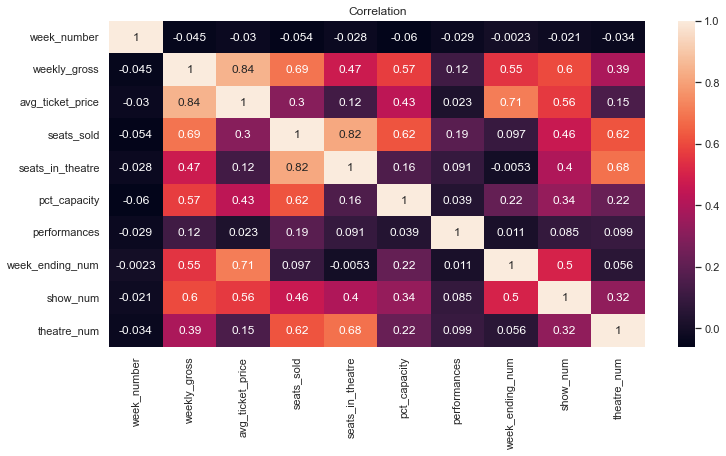

In [30]:
#The same correlation but in heatmap for better understanding
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(df_numeric.corr(), annot = True)
plt.title('Correlation')
plt.show()

In [31]:
#Import of the scipy library for later analysis
from scipy import stats

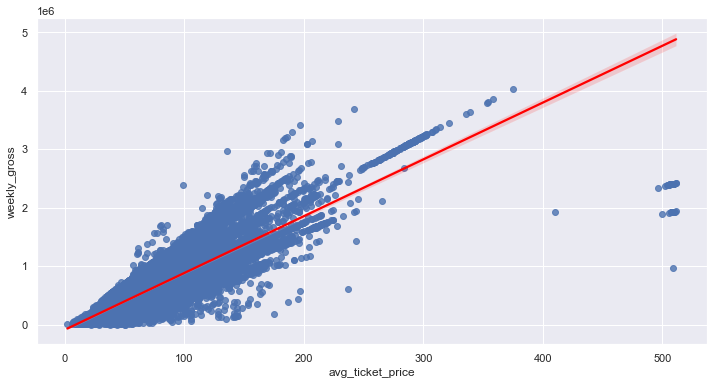

In [32]:
#Correlation between "Average ticket price" and "Weekly gross"
sns.regplot(x = "avg_ticket_price", y = "weekly_gross", data = df_numeric, line_kws={"color": "red"})
plt.show()

In [33]:
pearson_coef, p_value = stats.pearsonr(df_numeric['avg_ticket_price'], df_numeric['weekly_gross'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8439437912590078  with a P-value of P = 0.0


In [34]:
#Strong correlation because the Pearson coef = 0.84 and a P-value close to 0

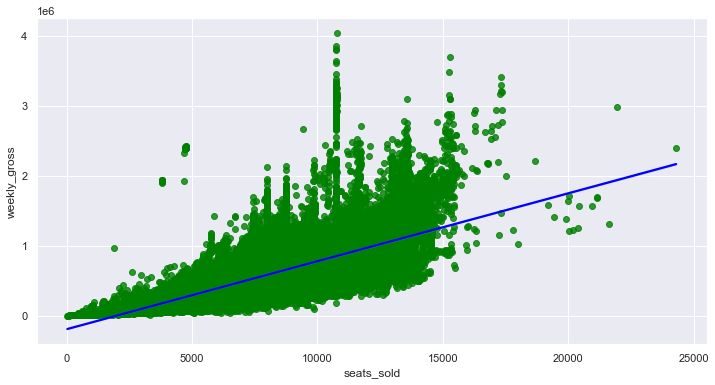

In [35]:
#Correlation between "Seats Sold" and "Weekly gross"
sns.regplot(x = "seats_sold", y = "weekly_gross", data = df_numeric, color = 'green', line_kws={"color": "blue"})
plt.show()

In [36]:
pearson_coef, p_value = stats.pearsonr(df_numeric['seats_sold'], df_numeric['weekly_gross'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.6935106793584356  with a P-value of P = 0.0


In [37]:
#Good correlation because the Pearson coef = 0.69 and P-value close to 0

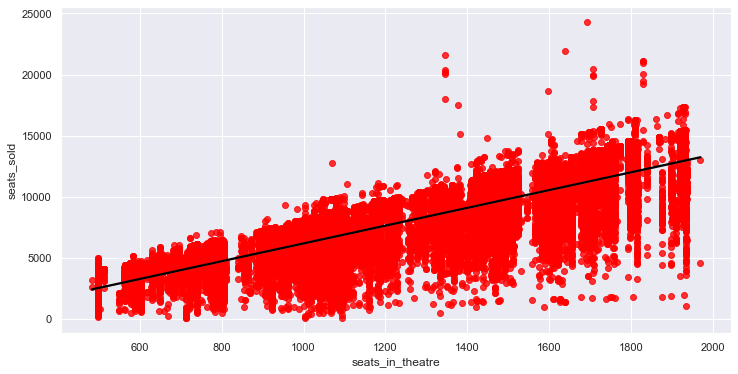

In [38]:
#Correlation between "Seats in theatre" and "Seats Sold"
sns.regplot(x = "seats_in_theatre", y = "seats_sold", data = df_numeric, color = 'red', line_kws={"color": "black"})
plt.show()

In [39]:
pearson_coef, p_value = stats.pearsonr(df_numeric['seats_in_theatre'], df_numeric['seats_sold'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8164688633191546  with a P-value of P = 0.0


In [40]:
#Strong correlation because the Pearson coef = 0.81 and a P-value close to 0

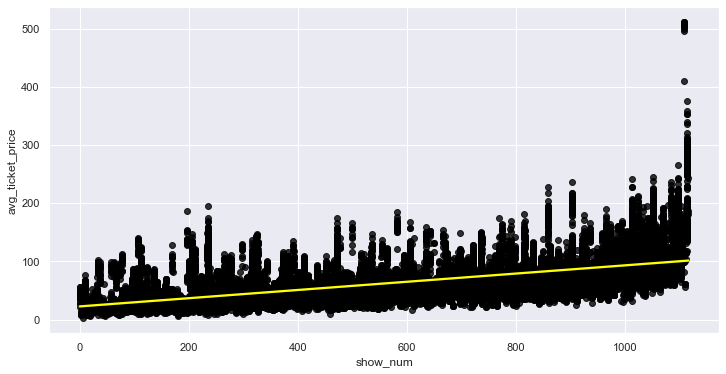

In [41]:
#Correlation between "Show (numerically categorized)" and "Average ticket price"
sns.regplot(x = "show_num", y = "avg_ticket_price", data = df_numeric, color = 'black', line_kws={"color": "yellow"})
plt.show()

In [42]:
pearson_coef, p_value = stats.pearsonr(df_numeric['show_num'], df_numeric['avg_ticket_price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5622940058297761  with a P-value of P = 0.0


In [43]:
#Some correlation because the Pearson coef = 0.56 and a P-value close to 0

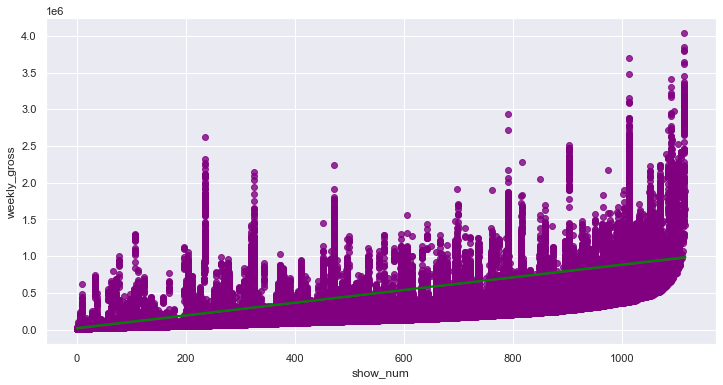

In [44]:
#Correlation between "Show (numerically categorized)" and "Weekly gross"
sns.regplot(x = "show_num", y = "weekly_gross", data = df_numeric, color = 'purple', line_kws={"color": "green"})
plt.show()

In [45]:
pearson_coef, p_value = stats.pearsonr(df_numeric['show_num'], df_numeric['weekly_gross'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5992943232112948  with a P-value of P = 0.0


In [46]:
#Some correlation because the Pearson coef = 0.60 and a P-value close to 0

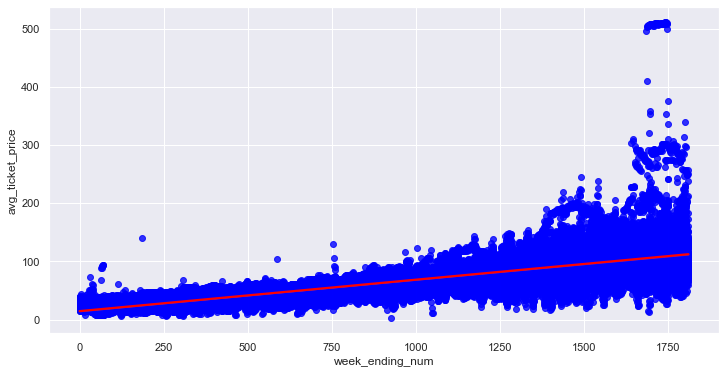

In [47]:
#Correlation between "Week ending (numerically categorized)" and "Average ticket price"
sns.regplot(x = "week_ending_num", y = "avg_ticket_price", data = df_numeric, color = 'blue', line_kws={"color": "red"})
plt.show()

In [48]:
pearson_coef, p_value = stats.pearsonr(df_numeric['week_ending_num'], df_numeric['avg_ticket_price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7140746059972367  with a P-value of P = 0.0


In [49]:
#Good correlation because the Pearson coef = 0.71 and a P-value close to 0

In [50]:
#Creating categories for the "Seats Sold" column
bins = np.linspace(min(df["seats_sold"]), max(df["seats_sold"]), 4)
seats_sold_group_names = ['Few', 'Normal', 'Many']
df = df.copy()
df['seats_sold_binned'] = pd.cut(df["seats_sold"], bins, labels=seats_sold_group_names, include_lowest=True )

Text(0, 0.5, 'Seats Sold')

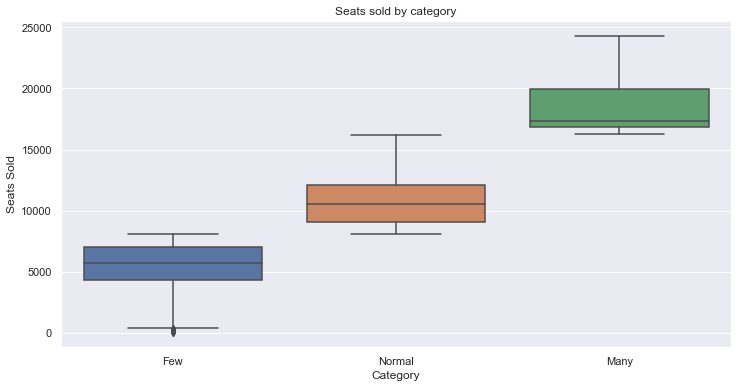

In [51]:
sns.boxplot(x = 'seats_sold_binned', y = 'seats_sold', data = df)
plt.title("Seats sold by category")
plt.xlabel("Category")
plt.ylabel("Seats Sold")

In [52]:
#Creating categories for the "Seats in theatre" column
bins = np.linspace(min(df["seats_in_theatre"]), max(df["seats_in_theatre"]), 4)
seats_in_theatre_group_names = ['Small', 'Medium', 'Large']
df = df.copy()
df['seats_in_theatre_binned'] = pd.cut(df["seats_in_theatre"], bins, labels=seats_in_theatre_group_names, include_lowest=True )

Text(0, 0.5, 'Seats in Theatre')

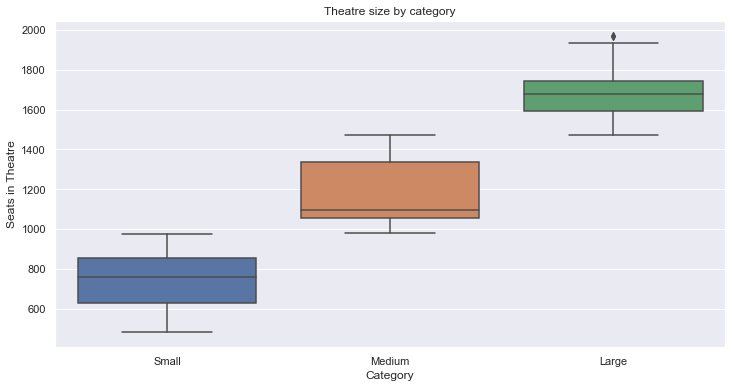

In [53]:
sns.boxplot(x = 'seats_in_theatre_binned', y = 'seats_in_theatre', data = df)
plt.title("Theatre size by category")
plt.xlabel("Category")
plt.ylabel("Seats in Theatre")

In [54]:
#Creating categories for the "Average ticket price" column
bins = np.linspace(min(df["avg_ticket_price"]), max(df["avg_ticket_price"]), 4)
bins

array([  2.09, 171.92, 341.75, 511.58])

In [55]:
avg_ticket_price_group_names = ['Cheap', 'Normal', 'Expensive']

In [56]:
df = df.copy()
df['avg_ticket_price_binned'] = pd.cut(df["avg_ticket_price"], bins, labels=avg_ticket_price_group_names, include_lowest=True )

Text(0, 0.5, 'Avg ticket price')

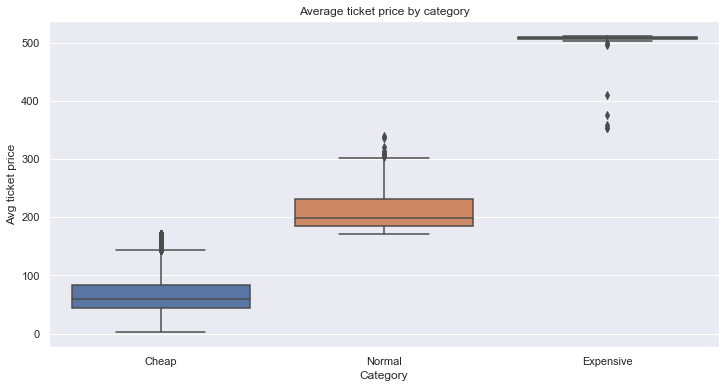

In [57]:
sns.boxplot(x = 'avg_ticket_price_binned', y = 'avg_ticket_price', data = df)
plt.title("Average ticket price by category")
plt.xlabel("Category")
plt.ylabel("Avg ticket price")

In [58]:
#Now I want to compare in boxplot the "Seats sold" and "Seats in theatre" columns.
#"Seats sold" represents the number in all the performances, so I must first multiply "seats in theatre" by "performances".
seats = df[['seats_sold', 'seats_in_theatre', 'performances']]

In [59]:
seats = seats.copy()
seats['acc_seats_in_theatre'] = seats["seats_in_theatre"] * seats["performances"]
seats = seats[["seats_sold", "acc_seats_in_theatre"]]

In [60]:
seats

,seats_sold,acc_seats_in_theatre
0,9281.0,13240.0
1,8167.0,11776.0
2,7386.0,8704.0
3,4586.0,5456.0
4,2938.0,5472.0
...,...,...
47519,8856.0,12840.0
47520,10004.0,11824.0
47521,9811.0,10045.0
47522,13920.0,13920.0


Text(0.5, 1.0, 'Seats Sold vs Seats in Theatre: Accumulation of all performances')

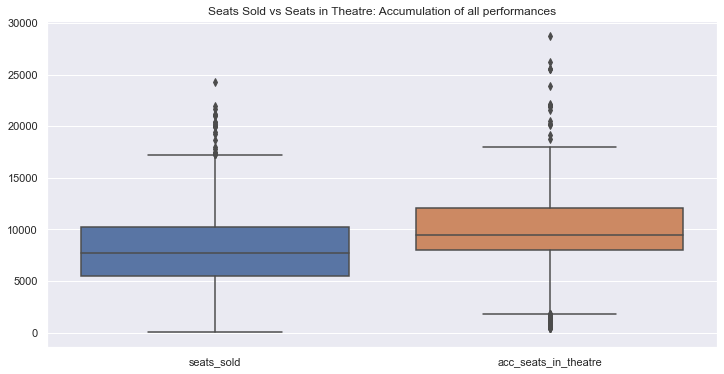

In [61]:
sns.boxplot(data = seats)
plt.title("Seats Sold vs Seats in Theatre: Accumulation of all performances")

In [62]:
#Finally, Let's see the total occupancy of all shows in all theatres
tot_occup = sum(seats["seats_sold"]) / sum(seats["acc_seats_in_theatre"])
print('The total occupancy of all shows in all theatres is', round(tot_occup*100, 2),"%")

The total occupancy of all shows in all theatres is 81.25 %
